In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


# **FOR SEE PARAMETER TUNNING--> CHECK SVC MODEL PARAM CHECKING**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,recall_score

In [3]:
df =pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.describe()[1:].T.style.background_gradient(cmap='GnBu', axis=1)

,mean,std,min,25%,50%,75%,max
battery_power,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


In [7]:
columns=df.columns
columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df_categorical = df[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)
df_categorical

,price_range,n_cores,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,1,2,0,0,0,0,0,1
1,2,3,1,1,1,1,1,0
2,2,5,1,1,1,1,1,0
3,2,6,1,0,0,1,0,0
4,1,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...
1995,0,6,1,1,1,1,1,0
1996,2,4,1,1,0,1,1,1
1997,3,8,0,1,1,1,1,0
1998,0,5,0,0,1,1,1,1


In [9]:
df_numerical = df.drop(df_categorical.columns, axis=1)

# **EDA**

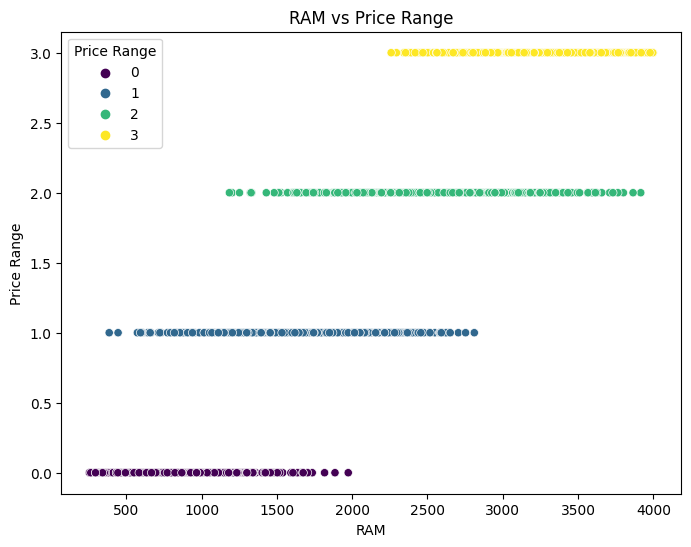

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ram', y='price_range', hue='price_range', palette='viridis')
plt.title('RAM vs Price Range')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.legend(title='Price Range')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


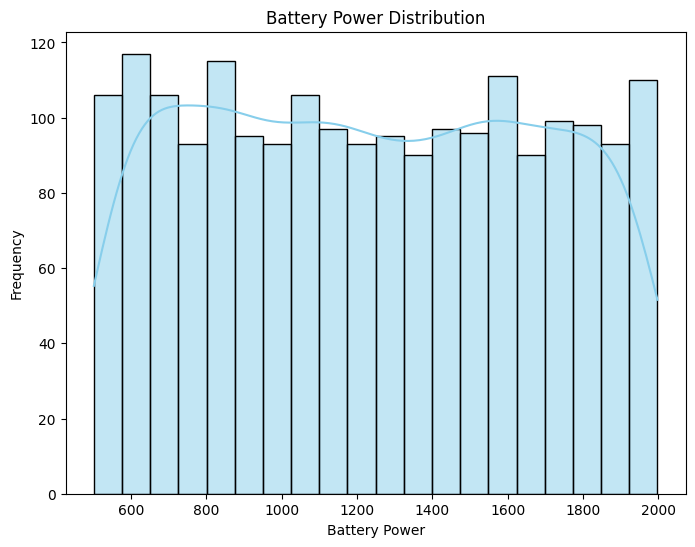

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['battery_power'], bins=20, kde=True, color='skyblue')
plt.title('Battery Power Distribution')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

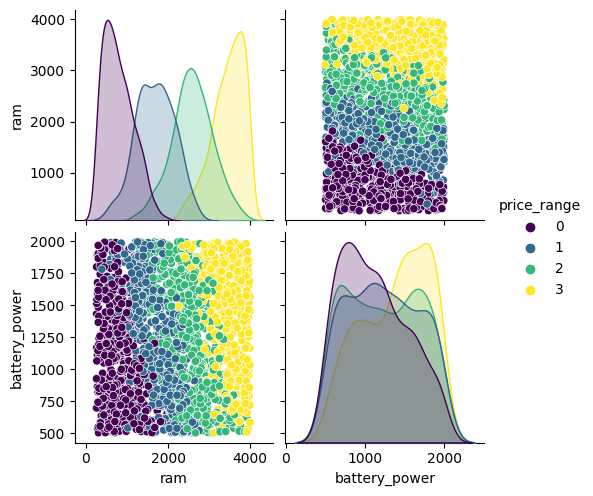

In [12]:
sns.pairplot(df[['ram', 'battery_power', 'price_range']], hue='price_range', palette='viridis')
plt.show()

<Axes: xlabel='mobile_wt', ylabel='Density'>

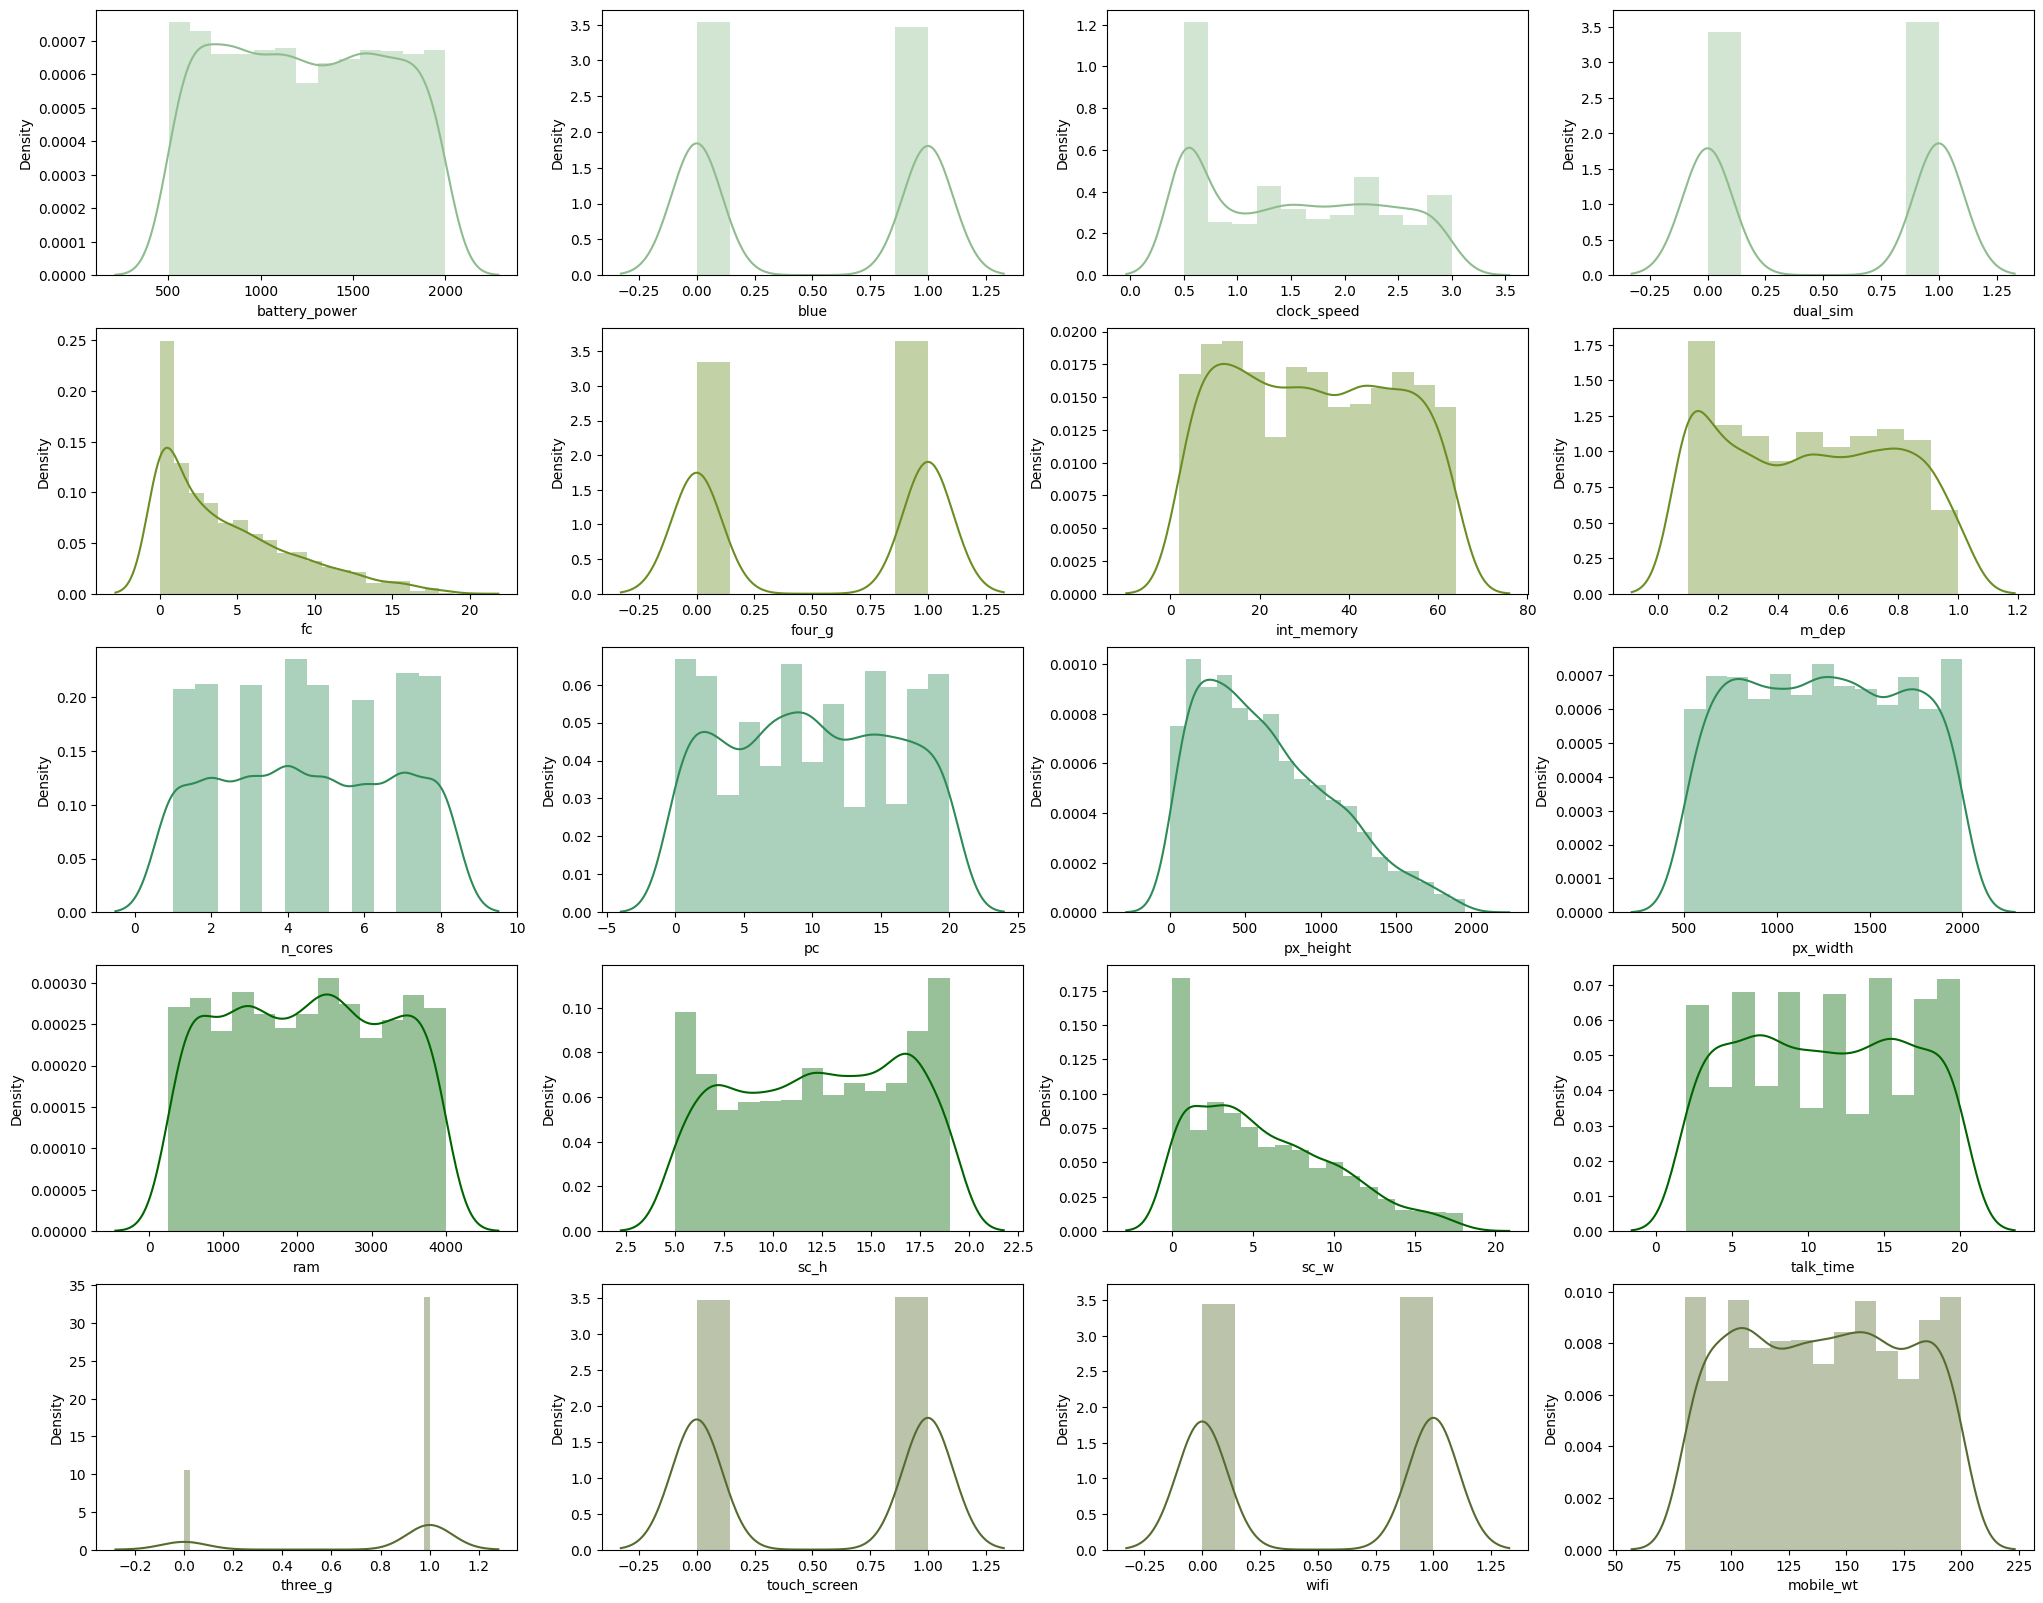

In [13]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(25,20))
plt.subplot(5,4,1)
sns.distplot(df['battery_power'],kde=True,color='darkseagreen')
plt.subplot(5,4,2)
sns.distplot(df['blue'],kde=True,color='darkseagreen')
plt.subplot(5,4,3)
sns.distplot(df['clock_speed'],kde=True,color='darkseagreen')
plt.subplot(5,4,4)
sns.distplot(df['dual_sim'],kde=True,color='darkseagreen')
plt.subplot(5,4,5)
sns.distplot(df['fc'],kde=True,color='olivedrab')
plt.subplot(5,4,6)
sns.distplot(df['four_g'],kde=True,color='olivedrab')
plt.subplot(5,4,7)
sns.distplot(df['int_memory'],kde=True,color='olivedrab')
plt.subplot(5,4,8)
sns.distplot(df['m_dep'],kde=True,color='olivedrab')
plt.subplot(5,4,9)
sns.distplot(df['n_cores'],kde=True,color='seagreen')
plt.subplot(5,4,10)
sns.distplot(df['pc'],kde=True,color='seagreen')
plt.subplot(5,4,11)
sns.distplot(df['px_height'],kde=True,color='seagreen')
plt.subplot(5,4,12)
sns.distplot(df['px_width'],kde=True,color='seagreen')
plt.subplot(5,4,13)
sns.distplot(df['ram'],kde=True,color='darkgreen')
plt.subplot(5,4,14)
sns.distplot(df['sc_h'],kde=True,color='darkgreen')
plt.subplot(5,4,15)
sns.distplot(df['sc_w'],kde=True,color='darkgreen')
plt.subplot(5,4,16)
sns.distplot(df['talk_time'],kde=True,color='darkgreen')
plt.subplot(5,4,17)
sns.distplot(df['three_g'],kde=True,color='darkolivegreen')
plt.subplot(5,4,18)
sns.distplot(df['touch_screen'],kde=True,color='darkolivegreen')
plt.subplot(5,4,19)
sns.distplot(df['wifi'],kde=True,color='darkolivegreen')
plt.subplot(5,4,20)
sns.distplot(df['mobile_wt'],kde=True,color='darkolivegreen')

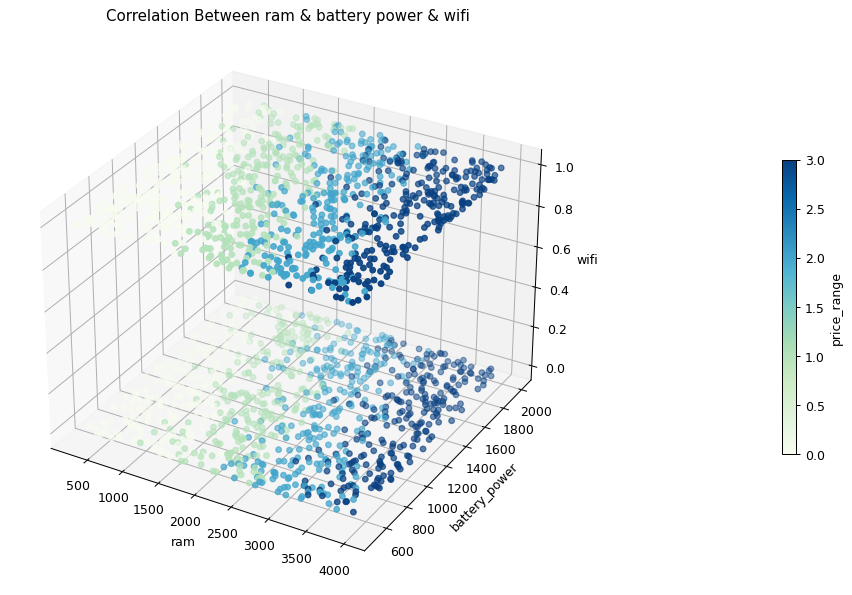

In [14]:
fig = plt.figure(figsize=(10, 8.5),dpi=90)
ax = fig.add_subplot(111,projection='3d')
p1 = ax.scatter(df['ram'], df['battery_power'], df['wifi'],c=df['price_range'],cmap='GnBu')
fig.colorbar(p1, shrink=0.5,label='price_range',anchor=(2,0.5))
ax.set_xlabel("ram")
ax.set_ylabel("battery_power")
ax.set_zlabel("wifi")
ax.set_title("Correlation Between ram & battery power & wifi",fontdict={'fontsize': 12})
fig.show()

 **increase in ram increase in price**

In [15]:
plt = px.scatter(df, x="ram", y="battery_power",size="talk_time", color ="price_range",size_max=15,color_continuous_scale="BrBG",hover_data=df[['mobile_wt']],template = 'plotly_white')
plt.show()

**higher ram and battery power more price**

In [16]:
fig = px.pie(df, values='price_range', names='n_cores',
             title='price range% of n cores',
             hover_data=['ram'],color_discrete_sequence=px.colors.sequential.GnBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=1000, height=800)
fig.show()

as like this see al

In [17]:
fig = px.pie(df, values='ram', names='price_range',
             title='price range%',
             hover_data=['ram'],color_discrete_sequence=px.colors.sequential.GnBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=1000, height=800)
fig.show()

as like this 

In [18]:
# measure of skewness
df.skew(axis = 0, skipna = True) 

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

# **MODELING**

In [19]:
threshold = 0.003

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["price_range"]) > threshold].tolist()
high_corr_features.remove("price_range")
print(high_corr_features)

X_selected = df[high_corr_features]
Y = df["price_range"]

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [21]:
# from sklearn import svm
# from sklearn.svm import SVC
# # finding the best test size value from 0.2 to 0.3
# test_size = np.arange(start=0.2, stop=0.35, step=0.05)
# score = []
# for size in test_size:
#     X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=size, random_state=42)
#     svm_model = svm.SVC()
#     svm_model.fit (X_train, Y_train)
#     score.append (svm_model.score (X_test, Y_test)) 
# r= pd.DataFrame({'Test size': test_size, 'Score': score})
# r.sort_values(by = ['Score'], ascending = False, inplace = True)
# r.style.highlight_max(color='#84a98c')

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# **SVC**

In [23]:
model1 = SVC()
model1.fit(X_train, Y_train)

SVC()

In [24]:
y_pred_1=model1.predict(X_test)
accuracy_score(Y_test,y_pred_1)


0.905

C (Regularization parameter): Controls the trade-off between achieving a low error on the training data and a low error on the test data. Higher values of C make the classifier aim to classify every training example correctly, potentially leading to overfitting.

Kernel: Defines the type of decision boundary. The most common kernel choices are:

'linear': For linearly separable data.
'poly': Polynomial kernel; useful if the data is not linearly separable but can be separated by a polynomial decision boundary.
'rbf': Radial Basis Function; a common default for non-linear data.
'sigmoid': Similar to a neural network’s activation function, though it’s less commonly used.
Gamma: This parameter is for 'rbf', 'poly', and 'sigmoid' kernels and affects the influence of individual training points.

'scale': Default in scikit-learn; calculates gamma as 
1
𝑛
features
n 
features
​
 
1
​
 .
'auto': Sets gamma to 
1
𝑛
samples
n 
samples
​
 
1
​
 .
Degree: Used with the 'poly' kernel and specifies the polynomial degree. Typical values are 2 or 3, but higher values may be tested if appropriate.

# **LET'S TRY WITH EACH PARAMETERS**

# **C**

In [25]:
model_c1=SVC(C=0.1)
model_c1.fit(X_train, Y_train)
y_pred_c1=model_c1.predict(X_test)
accuracy_score(Y_test,y_pred_c1)

0.64

In [26]:
model_c2=SVC(C=1)
model_c2.fit(X_train, Y_train)
y_pred_c2=model_c2.predict(X_test)
accuracy_score(Y_test,y_pred_c2)

0.905

In [27]:
model_c3=SVC(C=10)
model_c3.fit(X_train, Y_train)
y_pred_c3=model_c3.predict(X_test)
accuracy_score(Y_test,y_pred_c3)

0.895

In [28]:
model_c4=SVC(C=100)
model_c4.fit(X_train, Y_train)
y_pred_c4=model_c4.predict(X_test)
accuracy_score(Y_test,y_pred_c4)

0.895

# Let's see GAMMA parameter

In [29]:
model_g1=SVC(gamma='scale')
model_g1.fit(X_train, Y_train)
y_pred_g1=model_g1.predict(X_test)
accuracy_score(Y_test,y_pred_g1)

0.905

In [30]:
model_g2=SVC(gamma=0.1)
model_g2.fit(X_train, Y_train)
y_pred_g2=model_g2.predict(X_test)
accuracy_score(Y_test,y_pred_g2)

0.86

In [31]:
model_g3=SVC(gamma=10)
model_g3.fit(X_train, Y_train)
y_pred_g3=model_g3.predict(X_test)
accuracy_score(Y_test,y_pred_g3)

0.2275

In [32]:
model_g4=SVC(gamma=0.15)
model_g4.fit(X_train, Y_train)
y_pred_g4=model_g4.predict(X_test)
accuracy_score(Y_test,y_pred_g4)

0.785

# see Kernel parameter

In [33]:
model_k1=SVC(kernel="rbf")
model_k1.fit(X_train, Y_train)
y_pred_k1=model_k1.predict(X_test)
accuracy_score(Y_test,y_pred_k1)

0.905

In [34]:
model_k1=SVC(kernel="linear")
model_k1.fit(X_train, Y_train)
y_pred_k1=model_k1.predict(X_test)
accuracy_score(Y_test,y_pred_k1)




0.9775

# Now GRID SEARCH CV FOR BEST PARAMETERS

# **it will try each combination of parameters and find best parameters**

In [35]:
param_grid = { 'C': [0.1, 1, 10], 
              'gamma': ['scale', 0.1, 1, 10],
              'kernel': ['rbf'] }
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid_search.fit(X_train, Y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1, 10],
                         'kernel': ['rbf']},
             verbose=1)

In [36]:
print("train accuracy",grid_search.score(X_train, Y_train))


train accuracy 0.980625


In [37]:
y_pred_grid = grid_search.predict(X_test)

In [38]:
print("Classification Report:")
print(classification_report(Y_test, y_pred_grid))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.85      0.91      0.88        91
           2       0.85      0.85      0.85        92
           3       0.95      0.91      0.93       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



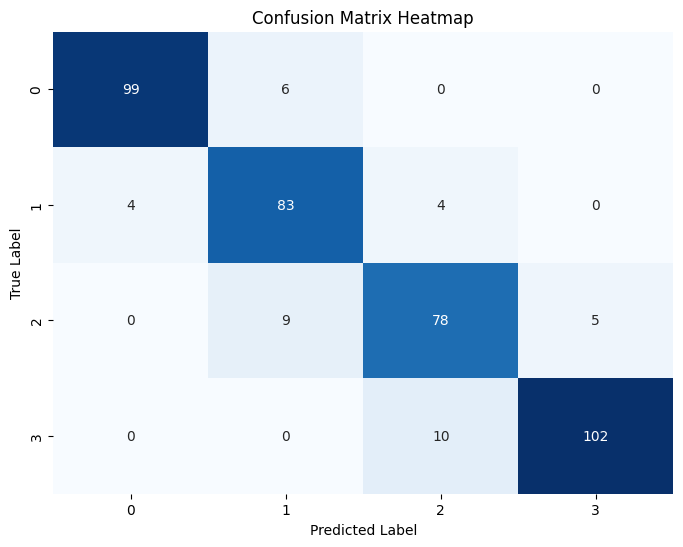

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Y_test and y_pred_grid are defined correctly
conf_matrix = confusion_matrix(Y_test, y_pred_grid)

# Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Creates a new figure
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


# **K-Fold**

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold

In [41]:
from sklearn import svm
from sklearn.svm import SVC 
model = svm.SVC(probability=True)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

C = [0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
param_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma} 

search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)
GridSearch = search.fit(X_train, Y_train)
svm_modelcv = GridSearch.best_estimator_ 
print('Best Score is: %s' % GridSearch.best_score_)
print('Best Hyperparameters are: %s' % GridSearch.best_params_)

Best Score is: 0.9654166666666666
Best Hyperparameters are: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


# **LOGISTIC REGRESSION**

In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [43]:
Y_pred = logreg.predict(X_test)
Y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [44]:
accuracy=accuracy_score(Y_test, Y_pred)
class_report=classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")

print(class_report)

Accuracy: 0.9800

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.96      1.00      0.98        91
           2       0.99      0.97      0.98        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



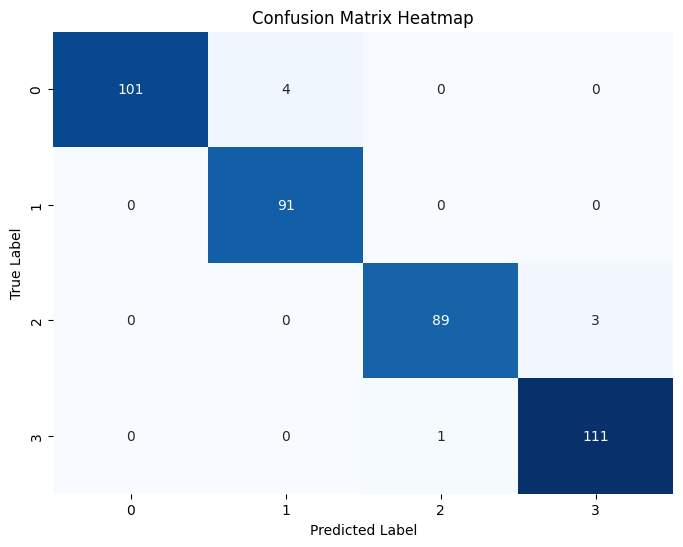

In [45]:
conf_matrix =confusion_matrix(Y_test, Y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [46]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['saga'],  # 'saga' supports l1, l2, elasticnet
    'l1_ratio': [0.0, 0.5, 1.0]  # Only used for elasticnet
}

# Set up GridSearchCV with the logistic regression model and parameter grid
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict using the best estimator on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_

Best Parameters: {'C': 0.01, 'l1_ratio': 0.0, 'penalty': 'none', 'solver': 'saga'}
Best Score: 0.9700000000000001
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.95      1.00      0.97        91
           2       0.99      0.98      0.98        92
           3       0.98      0.99      0.99       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



# WINNER IS LOGISTIC REGRESSION-->Accuracy: 0.9800
# THEN SVC LINEAR --->Accuracy :0.9775